il **Quartetto di Anscombe** comprende quattro dataset per cui le più comuni statistiche descrittive risultano praticamente identiche, ma che una volta riprodotti su un grafico assumono un aspetto molto diverso tra loro. Ciascun set di dati consiste in undici punti di coordinate (x,y).

Sono stati costruiti nel 1973 dallo statistico Francis Anscombe per dimostrare l'importanza di rappresentare graficamente i dati prima di analizzarli e l'effetto degli outlier sulle proprietà statistiche. Sostenne che il suo scopo era di attaccare l'idea diffusa tra gli statistici che "i calcoli numerici sono esatti, ma i grafici sono rozzi"

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [24]:
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv('../data/anscombe_quartet.csv')

**media di x**

In [9]:
df.groupby('dataset')['x'].mean()

dataset
I      9.0
II     9.0
III    9.0
IV     9.0
Name: x, dtype: float64

**varianza di x**

In [12]:
df.groupby('dataset')['x'].var()

dataset
I      11.0
II     11.0
III    11.0
IV     11.0
Name: x, dtype: float64

**media di y**

In [13]:
df.groupby('dataset')['y'].mean()

dataset
I      7.500909
II     7.500909
III    7.500000
IV     7.500909
Name: y, dtype: float64

**varianza di y**

In [14]:
df.groupby('dataset')['y'].var()

dataset
I      4.127269
II     4.127629
III    4.122620
IV     4.123249
Name: y, dtype: float64

**correlazione tra x e y**

In [15]:
df.groupby('dataset')[['x', 'y']].corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

**regressione lineare**

In [40]:
linear_regressor = LinearRegression()

datasets = ['I', 'II', 'III', 'IV']
for dataset in datasets:
    sub_df = df[df['dataset'] == dataset]
    model = linear_regressor.fit(sub_df[['x']], sub_df[['y']])
    print(model.coef_, model.intercept_)

[[0.50009091]] [3.00009091]
[[0.5]] [3.00090909]
[[0.49972727]] [3.00245455]
[[0.49990909]] [3.00172727]


**plot**

<Axes: xlabel='x', ylabel='y'>

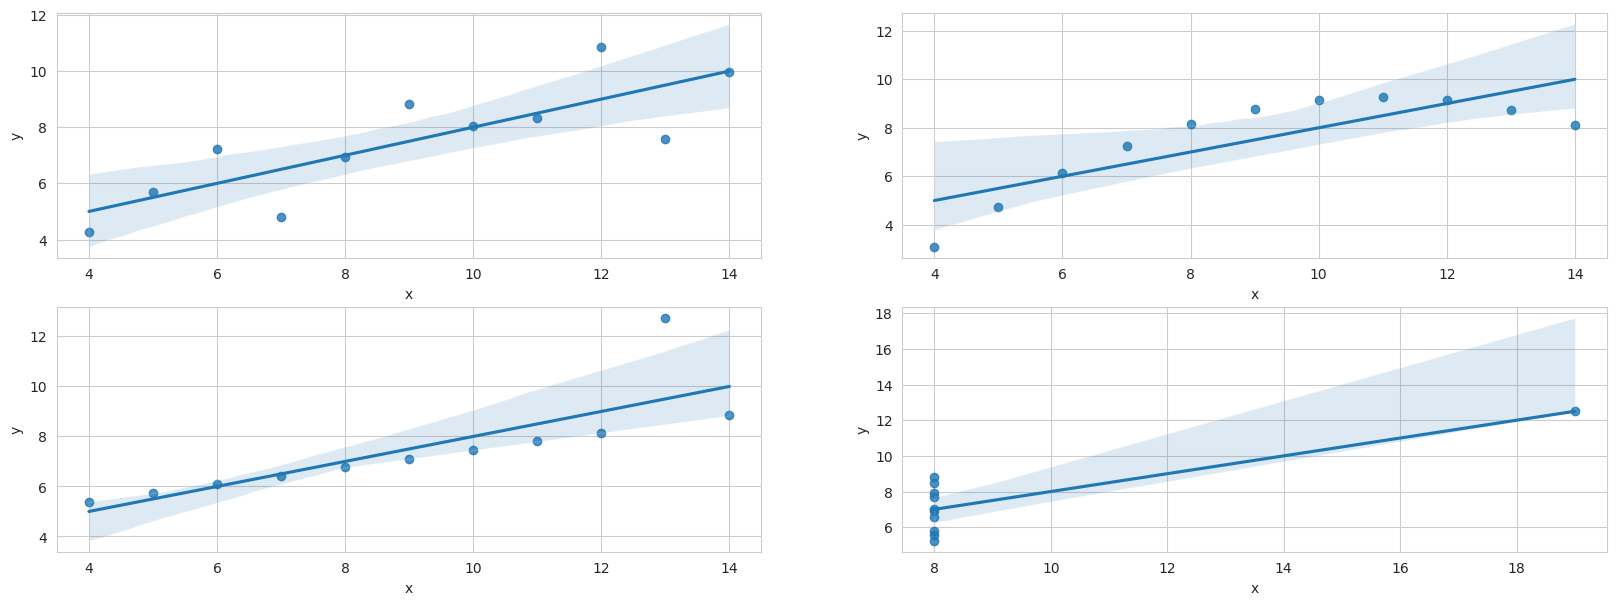

In [33]:
figure, axis = plt.subplots(ncols=2, nrows=2, figsize=(20, 7))
sns.regplot(data=df[df['dataset'] == 'I'], x='x', y='y', ax=axis[0][0])
sns.regplot(data=df[df['dataset'] == 'II'], x='x', y='y', ax=axis[0][1])
sns.regplot(data=df[df['dataset'] == 'III'], x='x', y='y', ax=axis[1][0])
sns.regplot(data=df[df['dataset'] == 'IV'], x='x', y='y', ax=axis[1][1])